<a href="https://colab.research.google.com/github/ntr262003/Infosys_Stroke_Patient_Healthcare/blob/main/Milestone3_Tulasiram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Comparing different ML models on Stroke Patient Healthcare data

<h2> Importing all reaquired Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<h3>Importing dataset

In [2]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

<h3>Handling missing values

In [3]:
# Handling missing values for the 'bmi' column by assigning the result back
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [4]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
display(df[['Residence_type']].head())

,Residence_type
0,1
1,0
2,0
3,1
4,0


<h3>Converting Categorical Data into Numerical Data

In [5]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)

In [6]:
df_model.head(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0


<h3>Preparing data for training

In [7]:
X = df_model.drop('stroke', axis=1) # independent variable
y = df_model['stroke'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
802,4970,79.00,0,0,112.64,28.5,0,0,0,1,1,0,0
3927,56137,62.00,0,0,88.32,36.3,0,0,1,0,0,0,0
2337,54590,21.00,0,0,59.52,33.7,0,0,1,0,0,1,0
3910,36548,31.00,0,0,65.70,30.4,0,0,0,0,1,0,0
1886,61171,31.00,0,0,59.63,19.9,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,0,0,0,0,0,1,0
466,1307,61.00,1,0,170.05,60.2,0,0,1,0,0,0,1
3092,31481,1.16,0,0,97.28,17.8,0,0,0,0,0,0,0
3772,61827,80.00,0,0,196.08,31.0,0,0,0,1,1,0,0


<h3>Observation</h3>


*   The data is split into features (X) and the target variable (y). X contains the columns that will be used to predict whether a person had a stroke (y).
*   Finally, we split the data into training and test sets, with 80% for training and 20% for testing. This split allows us to train the model and then evaluate it on unseen data.



# Basic Machine Learning Models

- Linear Regression
- Lasso Regression
- Ridge Regression
- Logistic Regression


# Root Mean Square error values (RMSE)
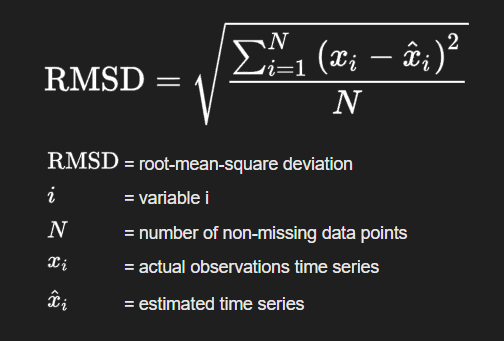

<h3>Training Linear Regression Model

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100

22.75928879858726

<h3>Observation


*   We train a linear regression model on the training data (X_train and y_train).
*   After training, the model predicts values for the test set.

*   We calculate the root mean square error (RMSE) of these predictions, which tells us how much error there is in our model’s predictions. Lower RMSE values indicate better performance.







<h3>Training Lasso Regression Model

In [9]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100

23.758795130268975

<h3>Observation


*   A lasso regression model is trained and evaluated on the same data as above.

*   Lasso regression is a variation of linear regression that adds a penalty for large coefficients, which can help prevent overfitting.
*   The RMSE is calculated again, giving insight into how well the lasso model predicts.





<h3>Training Ridge Regression Model

In [10]:
Rigid_reg = Ridge()
Rigid_reg.fit(X_train, y_train)
Rigid_reg_predictions = Rigid_reg.predict(X_test)
Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))
Rigid_reg_rmse*100

22.759457732980522

<h3>Observation

*   This cell trains a ridge regression model. Ridge regression is another variant of linear regression that also penalizes large coefficients but in a different way from lasso.

*   The model’s RMSE is calculated, which helps us compare its performance against linear and lasso regression.





<h3>Training Logistic Regression Model

In [11]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100

24.630339428279314

<h3>Observation


*   A logistic regression model is trained on the data. Unlike the previous regression models, logistic regression is generally used for classification (predicting categories rather than continuous values).

*   Here, we’re calculating RMSE for consistency, but typically, accuracy is a better measure for classification models.







# Accuracy score

In [12]:
clf.score(X_test, y_test)*100

93.9334637964775

<h3>Observation


*   This calculates the accuracy of the classification model (e.g., Logistic Regression) on the test data




In [20]:
Rigid_reg.score(X_test, y_test)*100

9.100249800405514

<h3>Observation


*   This calculates the performance of the Ridge Regression model.



In [21]:
lasso_reg.score(X_test, y_test)*100

0.9424244362517764

<h3>Observation

*   Similar to Ridge Regression, this computes the performance of the Lasso Regression model.



In [25]:
linear_reg.score(X_test, y_test)*100

9.101599220706902

<h3>Observation

*   This calculates the performance of the Linear Regression model.



#Plotting Graphs to show Accuracy and RMSE

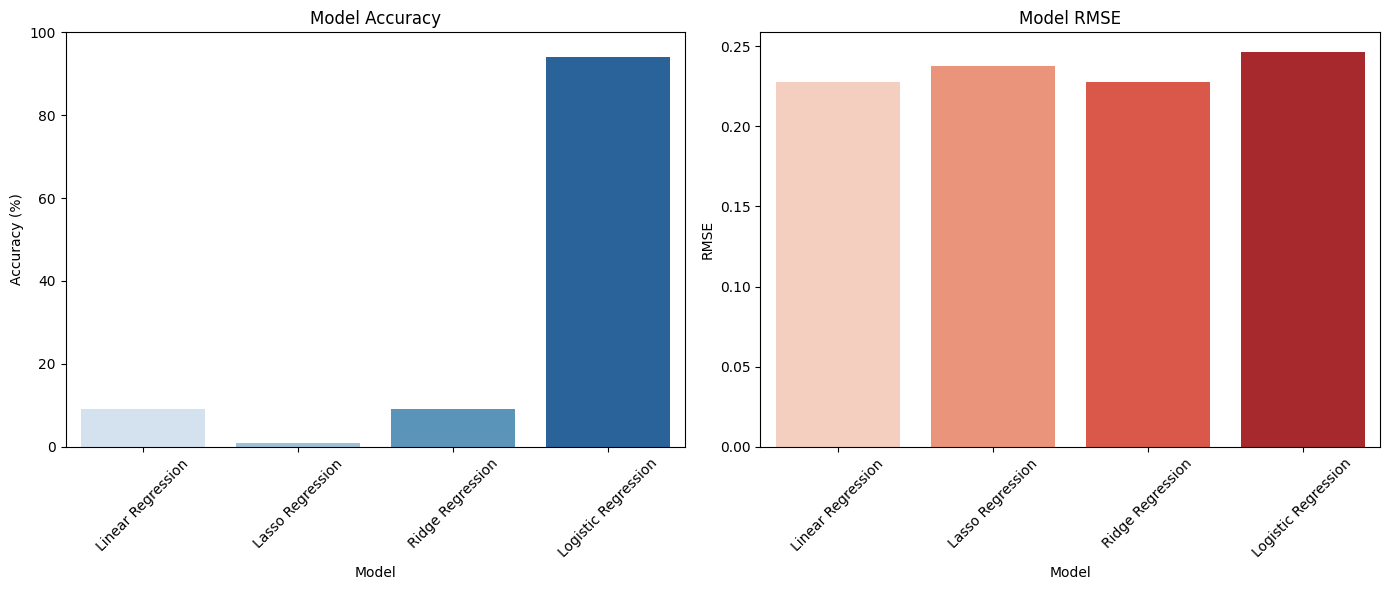

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining model names and corresponding RMSE and accuracy scores
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression']
rmse_scores = [linear_reg_rmse, lasso_reg_rmse, Rigid_reg_rmse, Log_reg_rmse]

# Converting accuracy to percentage scale for consistency (multiply R² by 100 for regression)
accuracy_scores = [
    linear_reg.score(X_test, y_test) * 100,
    lasso_reg.score(X_test, y_test) * 100,
    Rigid_reg.score(X_test, y_test) * 100,
    clf.score(X_test, y_test) * 100
]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
sns.barplot(x=model_names, y=accuracy_scores, ax=ax1, palette='Blues')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim(0, 100)  # Setting y-axis limit from 0 to 100 for consistency

# RMSE plot
sns.barplot(x=model_names, y=rmse_scores, ax=ax2, palette='Reds')
ax2.set_title('Model RMSE')
ax2.set_xlabel('Model')
ax2.set_ylabel('RMSE')

# Rotating x labels for better readability
for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



<h3>Observation</h3>

<h3>Model Accuracy(Left Chart)</h3>


*   Logistic Regression achieves the highest accuracy, close to 94%, meaning it consistently makes correct predictions for this dataset.
*   Linear Regression, Lasso Regression, and Ridge Regression have very low accuracy scores, indicating they struggle to classify outcomes correctly.


*   The significant difference highlights that Logistic Regression is much better suited for classification tasks in this healthcare dataset.

<h3>Model RMSE(Right Chart)</h3>


*   The RMSE values for all models are close, around 0.25, showing similar levels of average prediction error.

*   A lower RMSE typically indicates better predictions.



*   Here Linear Regression has slightly lower RMSE score as  it is specifically designed to minimize errors in continuous predictions by finding the line of best fit.








---



#Why certain models have good accuracy and other's don't?

<h3>Different Models for Different Tasks:</h3>


*   Logistic Regression is designed for classification problems, where you predict categories (like "yes" or "no"), such as whether someone had a stroke or not.
*   Linear Regression, Ridge, and Lasso are designed for predicting continuous values (like age or temperature) and are better suited for regression tasks.

<h3>Why Logistic Regression is Better for Classification:</h3>


*   Logistic Regression works well on binary classification tasks (two outcomes), so it gives high accuracy for problems like predicting stroke vs. no stroke.

<h3>Limitations of Regression Models:</h3>

*   Models like Linear, Ridge, and Lasso try to predict numbers and fit a line to minimize errors, but they struggle with classification tasks because they aren’t designed for categories.

<h3>RMSE and Accuracy:</h3>

*   Linear Regression may have a slightly lower RMSE, but that doesn’t mean it’s better for classification. RMSE measures errors for continuous data, not for categorizing outcomes.
*  For classification tasks, accuracy is a more important measure than RMSE. Even with lower RMSE, Linear Regression isn’t the best choice for predicting categories.


